In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hout = np.load('hout_mnist_train.npy', allow_pickle=True)
hout = [np.array(hout[i], dtype=np.float32) for i in range(len(hout))]

In [3]:
thre = 0.05
chout =  [hout[i].shape[0] for i in range(len(hout))]
phout0 = [np.sum(hout[i] < thre, axis=0) / chout[i] for i in range(len(hout))]
phout1 = [np.sum(hout[i] > 1-thre, axis=0) / chout[i] for i in range(len(hout))]
phoutbetw = [np.sum((hout[i] >= thre) & (hout[i] <= 1-thre) , axis=0) / chout[i] for i in range(len(hout))]

In [4]:
def lp(h, y, i):
    return np.log(np.where(h < thre, phout0[y][i], 
                            np.where(h > 1-thre, phout1[y][i], phoutbetw[y][i])) )

def uncertainty(houtt, y):
    llike = np.array([lp(houtt[y][:, i], y, i) for i in range(phout0[0].shape[0])])
    return llike.sum(axis=0)

In [5]:
houtt = np.load('hout_mnist_test.npy', allow_pickle=True)
houtt = [np.array(houtt[i], dtype=np.float32) for i in range(len(houtt))]

In [6]:
y_ture = np.concatenate([houtt[i][:,-1] for i in range(len(houtt))])
pro = np.concatenate([uncertainty(houtt, i) for i in range(len(houtt))])

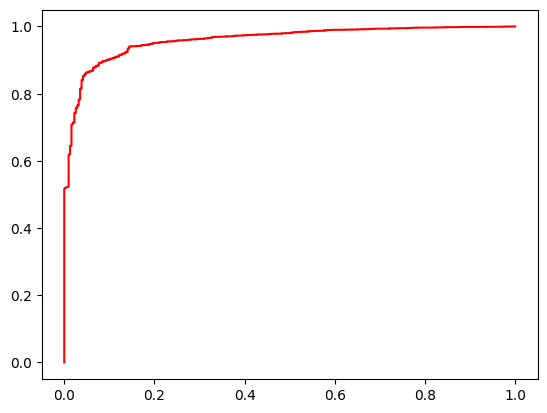

(96.03923904471952, -17.78436136387372)

In [166]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_ture, pro)
roc_auc = roc_auc_score(y_ture, pro)
plt.plot(fpr, tpr, color='r', linestyle='-')
plt.show()
roc_auc * 100, thresholds[np.argmax(tpr - fpr)]